### Get the data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close


--2023-12-03 18:23:56--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.175.207, 74.125.24.207, 142.251.10.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.175.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  22.9MB/s    in 5.7s    

2023-12-03 18:24:02 (18.3 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



<bound method ZipFile.close of <zipfile.ZipFile filename='pizza_steak.zip' mode='r'>>

### Inspect the data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [2]:
import os

# Walk through the pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} and {len(filenames)} images in '{dirpath}'.")

There are 2 and 0 images in 'pizza_steak'.
There are 2 and 0 images in 'pizza_steak/test'.
There are 0 and 250 images in 'pizza_steak/test/pizza'.
There are 0 and 250 images in 'pizza_steak/test/steak'.
There are 2 and 0 images in 'pizza_steak/train'.
There are 0 and 750 images in 'pizza_steak/train/pizza'.
There are 0 and 750 images in 'pizza_steak/train/steak'.


In [ ]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Dec  2 13:14 .
drwxr-xr-x 1 root root 4096 Dec  2 14:38 ..
drwxr-xr-x 4 root root 4096 Dec  2 13:14 test
drwxr-xr-x 4 root root 4096 Dec  2 13:14 train


In [ ]:
# Alternative way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programatically.

In [3]:
# Get the classnames programatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [4]:
# Visualize images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Set the target directory (view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") #return shape of image

  return img


['2885796.jpg']
Image shape: (512, 512, 3)


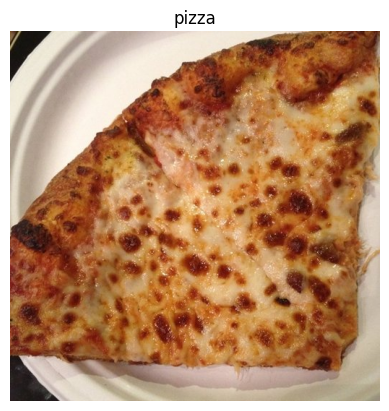

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

**Note:** ML models and neural network prefer to work with values between 0 and 1. Therefore, we'll scale (normalize) their pixel values by dividing the image arrays by 255, since 255 is the max pixel value.

In [ ]:
import tensorflow as tf
img/255.

array([[[0.42745098, 0.28235294, 0.11764706],
        [0.44705882, 0.29803922, 0.15294118],
        [0.42352941, 0.27843137, 0.16470588],
        ...,
        [0.42745098, 0.23137255, 0.14117647],
        [0.39607843, 0.21176471, 0.10980392],
        [0.43921569, 0.25490196, 0.14509804]],

       [[0.48627451, 0.34117647, 0.17647059],
        [0.45098039, 0.31372549, 0.16470588],
        [0.42352941, 0.27843137, 0.16470588],
        ...,
        [0.43137255, 0.24313725, 0.15294118],
        [0.43137255, 0.24705882, 0.14509804],
        [0.45098039, 0.2745098 , 0.16078431]],

       [[0.50980392, 0.37254902, 0.20784314],
        [0.47058824, 0.33333333, 0.18431373],
        [0.45098039, 0.30980392, 0.18431373],
        ...,
        [0.42352941, 0.24313725, 0.15294118],
        [0.46666667, 0.28627451, 0.19215686],
        [0.47843137, 0.30588235, 0.2       ]],

       ...,

       [[0.16078431, 0.12156863, 0.1254902 ],
        [0.16470588, 0.1254902 , 0.12941176],
        [0.16862745, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 9s 135ms/step - loss: 0.6770 - accuracy: 0.5540 - val_loss: 0.5649 - val_accuracy: 0.6740
Epoch 2/5
47/47 [==============================] - 6s 123ms/step - loss: 0.5241 - accuracy: 0.7387 - val_loss: 0.4656 - val_accuracy: 0.7980
Epoch 3/5
47/47 [==============================] - 6s 135ms/step - loss: 0.4442 - accuracy: 0.8100 - val_loss: 0.3830 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 8s 164ms/step - loss: 0.4195 - accuracy: 0.8133 - val_loss: 0.4069 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 7s 157ms/step - loss: 0.3907 - accuracy: 0.8380 - val_loss: 0.3344 - val_accuracy: 0.8560


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 6s 107ms/step - loss: 0.9034 - accuracy: 0.6600 - val_loss: 0.5065 - val_accuracy: 0.7460
Epoch 2/5
47/47 [==============================] - 6s 133ms/step - loss: 0.5513 - accuracy: 0.7407 - val_loss: 0.5002 - val_accuracy: 0.7660
Epoch 3/5
47/47 [==============================] - 5s 108ms/step - loss: 0.5137 - accuracy: 0.7513 - val_loss: 0.4467 - val_accuracy: 0.7900
Epoch 4/5
47/47 [==============================] - 6s 137ms/step - loss: 0.4628 - accuracy: 0.7927 - val_loss: 0.4548 - val_accuracy: 0.7800
Epoch 5/5
47/47 [==============================] - 5s 104ms/step - loss: 0.4506 - accuracy: 0.7967 - val_loss: 0.4593 - val_accuracy: 0.7920


In [ ]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 150528)            0         
                                                                 
 dense_19 (Dense)            (None, 10)                1505290   
                                                                 
 dense_20 (Dense)            (None, 10)                110       
                                                                 
 dense_21 (Dense)            (None, 10)                110       
                                                                 
 dense_22 (Dense)            (None, 10)                110       
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1505631 (5.74 MB)
Trainable params: 1505

## Binary Classification: Breakdown

1. Become familiar with the data - Inspect the data
2. Preprocess the data (prepare for modelling - main step: scaling)
3. Create a baseline model
4. Fit the model
5. Evaluate the model
6. Hyperparameter tuning (improve baseline model)
7. Repeat till satisfied

### 1. Become familiar with the data

In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from keras.models import Sequential

['3007772.jpg']
Image shape: (288, 512, 3)
['3464027.jpg']
Image shape: (512, 512, 3)


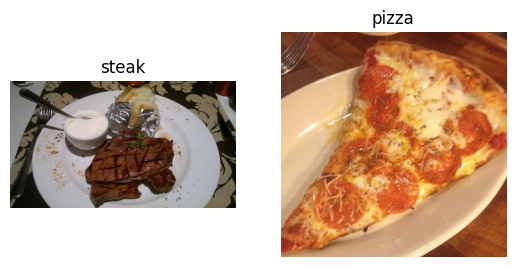

In [ ]:
# Visualize the data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")


### 2. Preprocess the data

In [11]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

The next step involves turning the data into **batches** to reduce computational power and save memory.

A batch is a small part of the data. Instead of looking at all 10.000 images at ONE time, a model might only look at 32 at a time.

Benefits of this:
1. 10.000, or more, images might not fit into the memory of a processor (GPU).
2. Learning patterns from 10.000+ images in one go could cause complexities for the model to learn well.

In [6]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [8]:
# Load image data from dirs and turn them into batches
train_data_2 = train_datagen.flow_from_directory(
    directory=train_dir, # Target directory of images
    target_size=(224, 224), # Target size of images (height, width)
    class_mode="binary", # Type of data you're working on
    batch_size=32
) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    class_mode="binary",
    batch_size=32
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [9]:
# Get a sample of a train data batch
images, labels = train_data_2.next() # get the "next" batch of images/labels in the train_data
len(images), len(labels)

(32, 32)

In [10]:
# Get first 2 images
images[:2], images[0].shape

(array([[[[0.53333336, 0.3803922 , 0.25882354],
          [0.4431373 , 0.27450982, 0.14901961],
          [0.45098042, 0.27450982, 0.15294118],
          ...,
          [0.4156863 , 0.19607845, 0.09803922],
          [0.427451  , 0.20784315, 0.10980393],
          [0.4039216 , 0.18431373, 0.08627451]],
 
         [[0.4666667 , 0.33333334, 0.227451  ],
          [0.34509805, 0.20000002, 0.09411766],
          [0.4156863 , 0.2627451 , 0.14901961],
          ...,
          [0.41176474, 0.20000002, 0.09803922],
          [0.41176474, 0.19215688, 0.09411766],
          [0.41960788, 0.20000002, 0.10196079]],
 
         [[0.43921572, 0.32941177, 0.24313727],
          [0.3137255 , 0.19607845, 0.10196079],
          [0.24313727, 0.10980393, 0.01176471],
          ...,
          [0.41960788, 0.20784315, 0.09803922],
          [0.43529415, 0.22352943, 0.1137255 ],
          [0.4156863 , 0.19607845, 0.09019608]],
 
         ...,
 
         [[0.3803922 , 0.13725491, 0.09411766],
          [0.39215

### 3. Create a CNN model

In [13]:
# Baseline model
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=(3, 3),
           strides=(1, 1),
           padding="valid",
           activation="relu",
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [14]:
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [15]:
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_4 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_5 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# Check the lengths of training and test data generators
len(train_data_2), len(test_data)

(47, 16)

In [17]:
history_4 = model_4.fit(
    train_data_2,
    epochs=5,
    steps_per_epoch=len(train_data_2),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 18s 139ms/step - loss: 0.7108 - accuracy: 0.6973 - val_loss: 0.4306 - val_accuracy: 0.8220
Epoch 2/5
47/47 [==============================] - 7s 155ms/step - loss: 0.4381 - accuracy: 0.8113 - val_loss: 0.4253 - val_accuracy: 0.7960
Epoch 3/5
47/47 [==============================] - 6s 128ms/step - loss: 0.3301 - accuracy: 0.8727 - val_loss: 0.3926 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 7s 153ms/step - loss: 0.1968 - accuracy: 0.9333 - val_loss: 0.4164 - val_accuracy: 0.8020
Epoch 5/5
47/47 [==============================] - 6s 122ms/step - loss: 0.1059 - accuracy: 0.9700 - val_loss: 0.4960 - val_accuracy: 0.7980


### 5. Evaluate model

<Axes: >

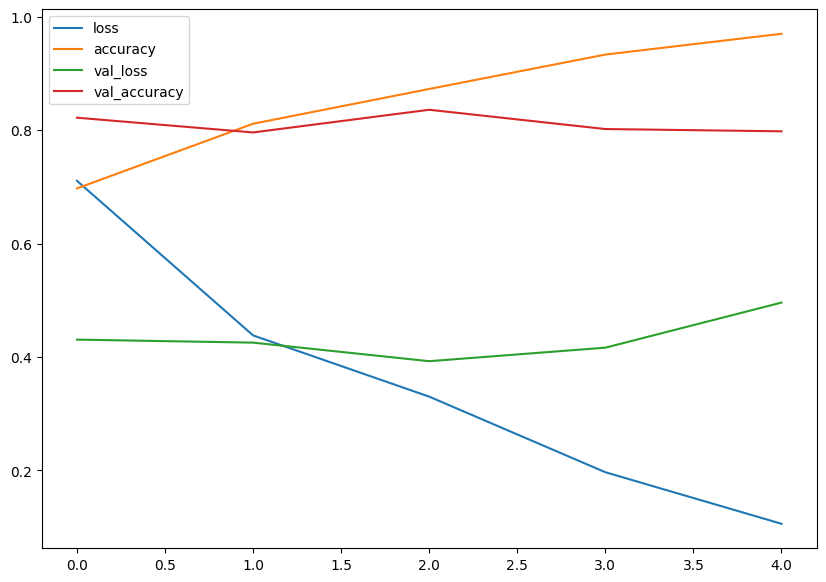

In [18]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [8]:
# Plot validation and training curves seperately
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend();

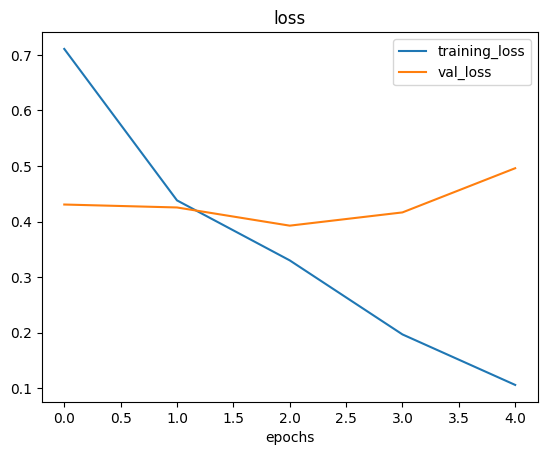

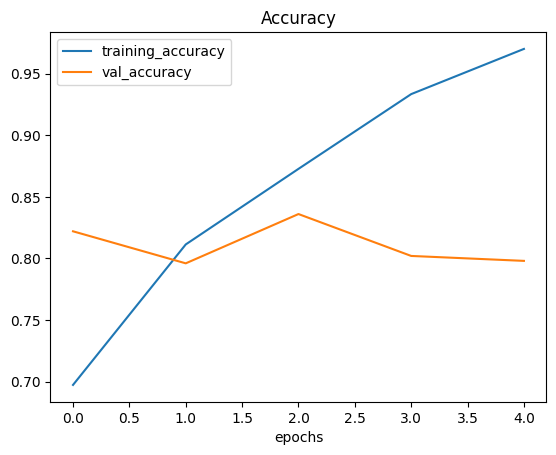

In [31]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

**Note** When a model's validation loss increases while the training loss decreases, it's likely indicating that the model is **overfitting** the training dataset. Meaning, it is learning the patterns in the training data too well, which leads to decreased model ability to generalize to unseen data.

### 6. Hyperparameter Tuning

Fitting a ML model comes in 3 steps:

0. Create a baseline model
1. Beat the baseline model by overfitting a larger model
2. Reduce overfitting

Ways to generate overfitting:

* Increate the number of conv layers (make NN deeper)
* Increase the number of conv filters
* Add another dense layer to the output of the flattened layer

Ways to reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data

In [32]:
# Create new baseline model
model_5 = Sequential([
    Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [33]:
model_5.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

In [35]:
history_5 = model_5.fit(
    train_data_2,
    epochs=5,
    steps_per_epoch=len(train_data_2),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 6s 132ms/step - loss: 0.5561 - accuracy: 0.7353 - val_loss: 0.4463 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 7s 142ms/step - loss: 0.4675 - accuracy: 0.7887 - val_loss: 0.3983 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 6s 130ms/step - loss: 0.4303 - accuracy: 0.8093 - val_loss: 0.3913 - val_accuracy: 0.8140
Epoch 4/5
47/47 [==============================] - 7s 147ms/step - loss: 0.4139 - accuracy: 0.8167 - val_loss: 0.4050 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 7s 142ms/step - loss: 0.4072 - accuracy: 0.8173 - val_loss: 0.3718 - val_accuracy: 0.8180


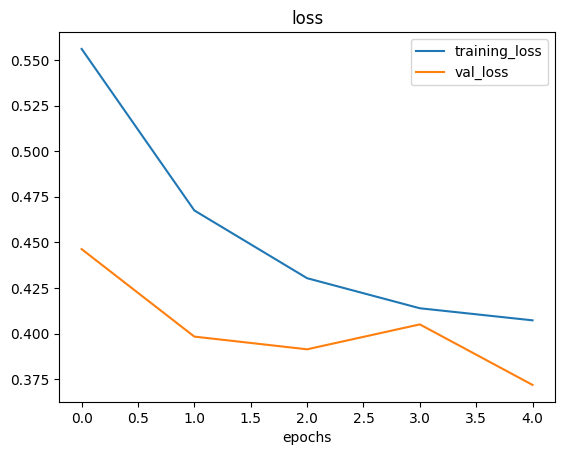

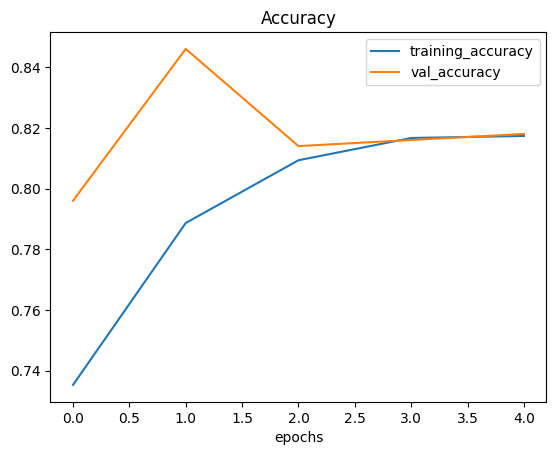

In [36]:
plot_loss_curves(history_5)

In [37]:
model_5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 26, 26, 10)       

### Introduction of Data Augmentation

Data augementation involves the process of altering the training data, to increase the diversity of the training data, without collecting more data. The intended outcome of this is for the model to be able to learn more generizable patterns.

In [9]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [12]:
# Create global variable for image size
IMG_SIZE = (224, 224)

# Import data and augment it from training dir
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=IMG_SIZE,
                                                                   class_mode="binary",
                                                                   batch_size=32,
                                                                   shuffle=True)

# Create non-augmented train data batches
print("Non-augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMG_SIZE,
                                               class_mode="binary",
                                               batch_size=32,
                                               shuffle=True)

# Create non-augmented test data batches
print("Non-augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             class_mode="binary",
                                             batch_size=32)

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


In [13]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # only the images are augmented - labels are NOT. the description is just a placeholder to reduce confusion.


showing image number: 30


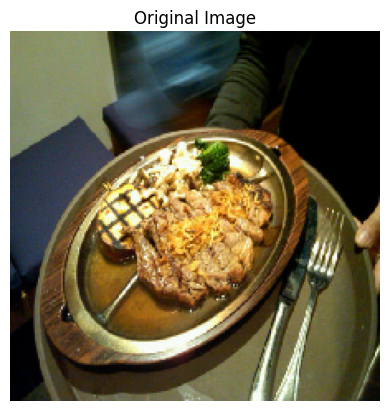

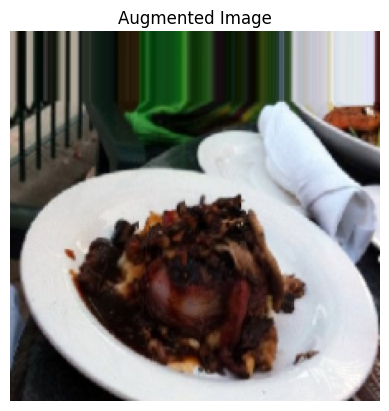

In [14]:
# Show original image and augmented image
import random
random_number = random.randint(0, 31) # batch sizes are 32
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False);

In [70]:
# Building model 6, fit on the augmented training data
model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 476ms/step - loss: 0.6641 - accuracy: 0.5893 - val_loss: 0.6643 - val_accuracy: 0.5480
Epoch 2/5
47/47 [==============================] - 24s 511ms/step - loss: 0.6050 - accuracy: 0.6653 - val_loss: 0.5943 - val_accuracy: 0.6840
Epoch 3/5
47/47 [==============================] - 24s 508ms/step - loss: 0.5197 - accuracy: 0.7420 - val_loss: 0.4810 - val_accuracy: 0.7780
Epoch 4/5
47/47 [==============================] - 23s 491ms/step - loss: 0.4948 - accuracy: 0.7700 - val_loss: 0.3718 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 22s 463ms/step - loss: 0.4946 - accuracy: 0.7667 - val_loss: 0.3830 - val_accuracy: 0.8460


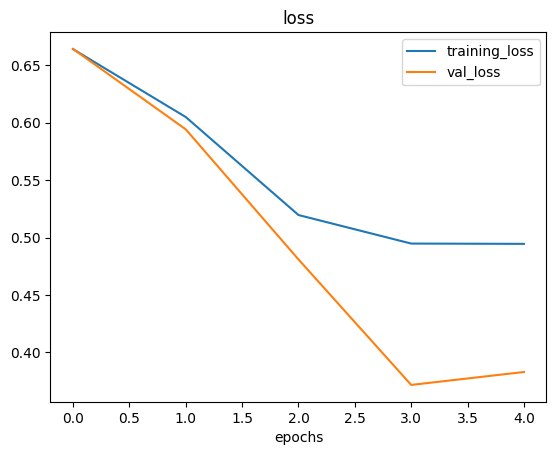

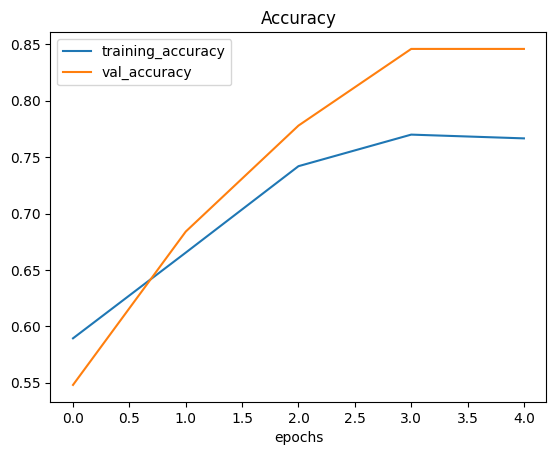

In [71]:
plot_loss_curves(history_6)

### 7. Repeat untill satisfied

Things to do to improve the model:

* Increase the number of layers (such as `Conv2D`/ `MaxPool2D`)
* Increase the number of filters (for instance from 10 -> 32 or even 64)
* Train for longer (more epochs)
* Find the ideal learning rate
* Get more data
* Use **transfer learning** to leverage what another image model has learned and adjust it for a specific use case

In [74]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                          rotation_range=0.2,
                                          shear_range=0.2,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=IMG_SIZE,
                                                                   class_mode="binary",
                                                                   batch_size=32)

Found 1500 images belonging to 2 classes.


In [15]:
# Create Tiny VGG architecture
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_7 = model_7.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 34s 472ms/step - loss: 0.6489 - accuracy: 0.6233 - val_loss: 0.4695 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 25s 544ms/step - loss: 0.5400 - accuracy: 0.7373 - val_loss: 0.4235 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 24s 513ms/step - loss: 0.5450 - accuracy: 0.7433 - val_loss: 0.4436 - val_accuracy: 0.8020
Epoch 4/5
47/47 [==============================] - 22s 473ms/step - loss: 0.5181 - accuracy: 0.7487 - val_loss: 0.3862 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 25s 527ms/step - loss: 0.5188 - accuracy: 0.7400 - val_loss: 0.3925 - val_accuracy: 0.8380


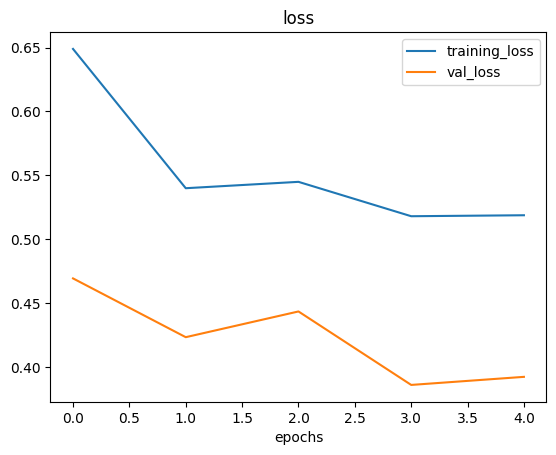

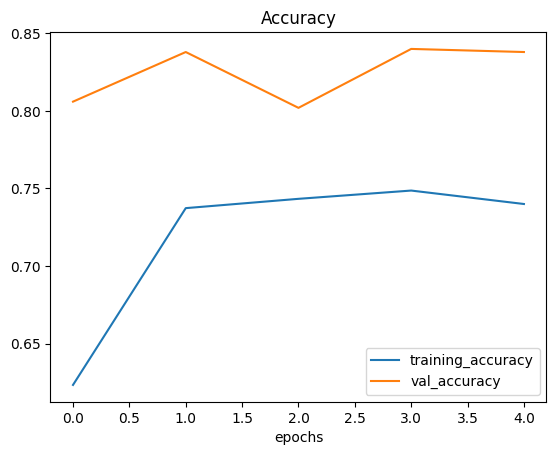

In [16]:
plot_loss_curves(history_7)

## Making a prediction with the trained model on custom data

In [17]:
print(class_names)

['pizza' 'steak']


In [30]:
!wget https://www.lemonblossoms.com/wp-content/uploads/2022/06/Pan_Seared_Steak_Recipe_12-650x975.jpg
steak = mpimg.imread("Pan_Seared_Steak_Recipe_12-650x975.jpg")

--2023-12-03 18:36:23--  https://www.lemonblossoms.com/wp-content/uploads/2022/06/Pan_Seared_Steak_Recipe_12-650x975.jpg
Resolving www.lemonblossoms.com (www.lemonblossoms.com)... 172.67.163.96, 104.21.81.183, 2606:4700:3030::6815:51b7, ...
Connecting to www.lemonblossoms.com (www.lemonblossoms.com)|172.67.163.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 187404 (183K) [image/jpeg]
Saving to: ‘Pan_Seared_Steak_Recipe_12-650x975.jpg.1’

Pan_Seared_Steak_Re 100%[===================>] 183.01K   399KB/s    in 0.5s    

2023-12-03 18:36:25 (399 KB/s) - ‘Pan_Seared_Steak_Recipe_12-650x975.jpg.1’ saved [187404/187404]



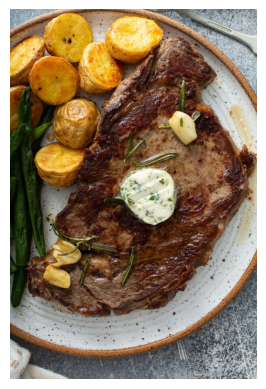

In [31]:
plt.imshow(steak)
plt.axis(False);

In [32]:
steak.shape

(975, 650, 3)

In [33]:
steak

array([[[120, 139, 154],
        [129, 148, 163],
        [144, 163, 178],
        ...,
        [156, 165, 164],
        [152, 158, 158],
        [163, 169, 169]],

       [[123, 142, 157],
        [134, 153, 168],
        [144, 163, 178],
        ...,
        [150, 159, 158],
        [164, 170, 170],
        [159, 165, 165]],

       [[140, 159, 174],
        [152, 171, 186],
        [154, 173, 188],
        ...,
        [175, 184, 183],
        [189, 198, 197],
        [178, 187, 186]],

       ...,

       [[210, 212, 209],
        [201, 203, 200],
        [193, 195, 192],
        ...,
        [167, 169, 166],
        [225, 225, 223],
        [211, 212, 207]],

       [[188, 190, 187],
        [199, 201, 198],
        [196, 198, 195],
        ...,
        [158, 160, 159],
        [205, 207, 206],
        [211, 213, 212]],

       [[187, 189, 186],
        [201, 203, 200],
        [196, 198, 195],
        ...,
        [152, 156, 159],
        [191, 195, 198],
        [215, 219, 220]]

In [34]:
steak = tf.constant(steak) / 255

In [35]:
steak

<tf.Tensor: shape=(975, 650, 3), dtype=float32, numpy=
array([[[0.47058824, 0.54509807, 0.6039216 ],
        [0.5058824 , 0.5803922 , 0.6392157 ],
        [0.5647059 , 0.6392157 , 0.69803923],
        ...,
        [0.6117647 , 0.64705884, 0.6431373 ],
        [0.59607846, 0.61960787, 0.61960787],
        [0.6392157 , 0.6627451 , 0.6627451 ]],

       [[0.48235294, 0.5568628 , 0.6156863 ],
        [0.5254902 , 0.6       , 0.65882355],
        [0.5647059 , 0.6392157 , 0.69803923],
        ...,
        [0.5882353 , 0.62352943, 0.61960787],
        [0.6431373 , 0.6666667 , 0.6666667 ],
        [0.62352943, 0.64705884, 0.64705884]],

       [[0.54901963, 0.62352943, 0.68235296],
        [0.59607846, 0.67058825, 0.7294118 ],
        [0.6039216 , 0.6784314 , 0.7372549 ],
        ...,
        [0.6862745 , 0.72156864, 0.7176471 ],
        [0.7411765 , 0.7764706 , 0.77254903],
        [0.69803923, 0.73333335, 0.7294118 ]],

       ...,

       [[0.8235294 , 0.83137256, 0.81960785],
        [0.78

In [51]:
steak_resized = tf.expand_dims(tf.image.resize(steak, (224, 224)), axis=0)

Make prediction

In [66]:
pred = model_7.predict(steak_resized)
pred

1/1 [==============================] - 0s 39ms/step


array([[0.7678188]], dtype=float32)

In [44]:
train_data_augmented[0][0].shape

(32, 224, 224, 3)

In [75]:
# Create a function to import an image and resize it to be able to be used with the model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and resahpes it to (img_shape, img_shape, colour_channels)
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.

In [61]:
steak = load_and_prep_image("Pan_Seared_Steak_Recipe_12-650x975.jpg.1")

### Visualize the image as well as model's prediction

In [64]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [67]:
# Index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [76]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots atghe image with the predicted class as the title
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);